In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
from matplotlib import pyplot as plt
import folium
import plotly_express as px
import descartes

In [4]:
shp = './countries.gpkg'
countries = gpd.read_file(shp)

In [8]:
countries.head()

,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
0,Indonesia,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009..."
4,Peru,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [9]:
countries.shape

(253, 11)

In [10]:
countries.describe()

,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR
count,2.530000e+02,253.000000,2.530000e+02,253.000000,253.000000,253.000000
mean,2.927074e+07,11.462451,4.712708e+05,2000.794466,1639.592885,1991.490119
std,1.234639e+08,3.958562,1.936975e+06,178.959064,799.327438,218.598342
min,0.000000e+00,1.000000,0.000000e+00,0.000000,-99.000000,0.000000
25%,1.151200e+05,9.000000,2.851000e+03,2017.000000,2000.000000,2016.000000
50%,4.510327e+06,12.000000,3.299000e+04,2017.000000,2006.000000,2016.000000
75%,1.788524e+07,14.000000,1.890000e+05,2017.000000,2010.000000,2016.000000
max,1.379303e+09,18.000000,2.114000e+07,2017.000000,2012.000000,2016.000000


In [14]:
cities = gpd.read_file('./cities.geojson')
cities.describe()

,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other
count,7343.000000,7343.000000,7343.000000,7343.000000,7.343000e+03,7.343000e+03,7.343000e+03
mean,0.009533,0.080349,20.496166,10.987582,3.218734e+05,2.078131e+05,4.137240e+05
std,0.097177,0.271851,29.263073,79.435193,1.066623e+06,6.414873e+05,1.258383e+06
min,0.000000,0.000000,-89.982894,-179.589979,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,0.000000,0.000000,-0.674573,-64.781974,1.947850e+04,1.337000e+04,0.000000e+00
50%,0.000000,0.000000,26.640298,18.699985,6.945100e+04,5.003200e+04,3.981700e+04
75%,0.000000,0.000000,43.532008,73.292415,2.297540e+05,1.634720e+05,2.230085e+05
max,1.000000,1.000000,82.483323,179.383304,3.567600e+07,1.460851e+07,2.145995e+07


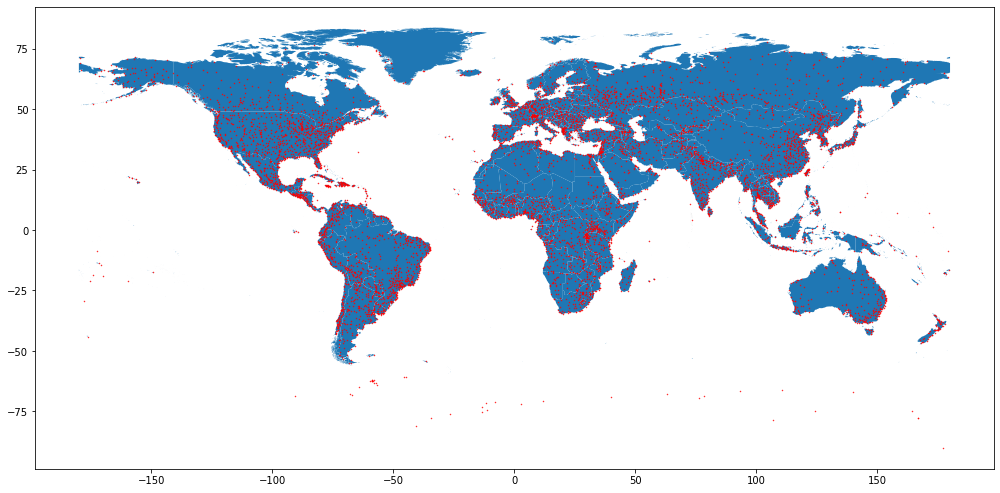

In [19]:
fig, ax = plt.subplots(figsize=(14, 12))
countries.plot(ax=ax)
cities.plot(markersize=0.2, color='red',ax=ax)
plt.tight_layout()
plt.savefig('overlay.png')
plt.show()

In [22]:
countries.crs == cities.crs

True

In [23]:
countries.geometry[:5]

0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
3    MULTIPOLYGON (((-69.51009 -17.50659, -69.51009...
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...
Name: geometry, dtype: geometry

In [25]:
countries_projected = countries.to_crs('epsg:3395')

countries_projected['geometry'][:5]

0    MULTIPOLYGON (((13102705.696 460777.652, 13102...
1    MULTIPOLYGON (((13102705.696 460777.652, 13101...
2    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
3    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
4    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
Name: geometry, dtype: geometry

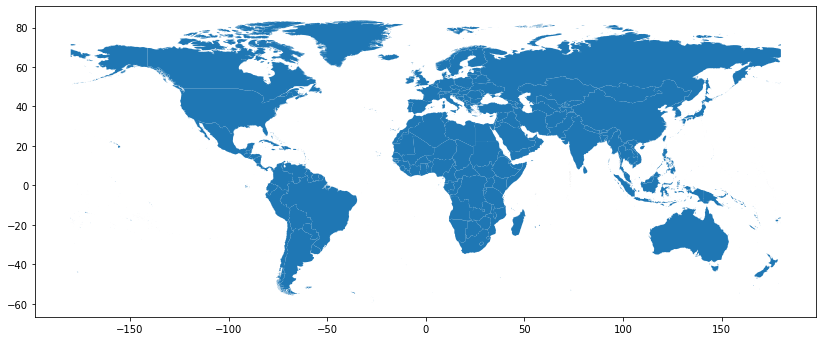

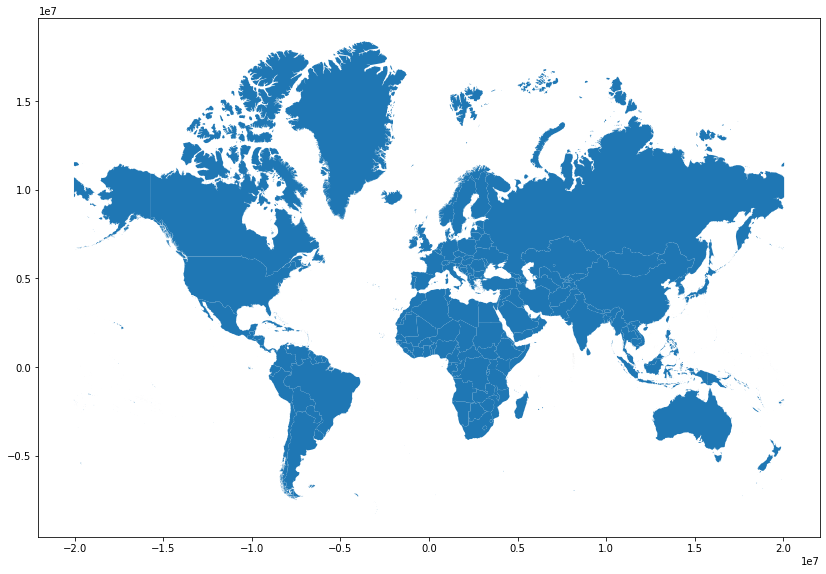

In [26]:
countries.plot(figsize=(14, 12))
plt.savefig('wgs84.png')

countries_projected.plot(figsize=(14, 12))
plt.savefig('mercator.png')

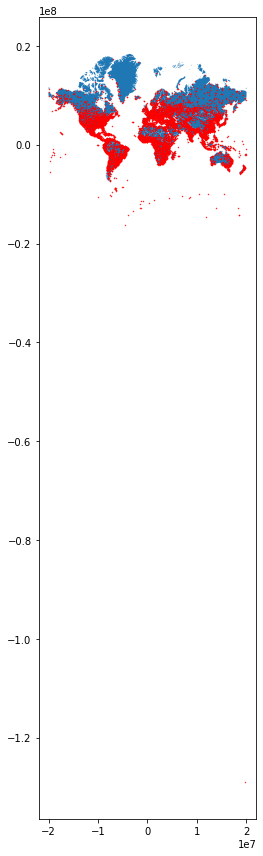

In [27]:
cities_projected = cities.to_crs('epsg:3395')
fig, ax = plt.subplots(figsize=(14, 12))
countries_projected.plot(ax=ax)
cities_projected.plot(markersize=0.2, color='red', ax=ax)
plt.tight_layout()
plt.savefig('mercator_cities.png')
plt.show()

In [30]:
print(countries_projected.head(8))

print(countries_projected.shape)

print(countries_projected.crs)

        NAME    POP_EST  POP_RANK  GDP_MD_EST  POP_YEAR  LASTCENSUS  GDP_YEAR  \
0  Indonesia  260580739        17   3028000.0      2017        2010      2016   
1   Malaysia   31381992        15    863000.0      2017        2010      2016   
2      Chile   17789267        14    436100.0      2017        2002      2016   
3    Bolivia   11138234        14     78350.0      2017        2001      2016   
4       Peru   31036656        15    410400.0      2017        2007      2016   
5  Argentina   44293293        15    879400.0      2017        2010      2016   
6   Dhekelia       7850         5       314.0      2013         -99      2013   
7     Cyprus    1221549        12     29260.0      2017        2001      2016   

                      ECONOMY               INCOME_GRP      CONTINENT  \
0    4. Emerging region: MIKT   4. Lower middle income           Asia   
1        6. Developing region   3. Upper middle income           Asia   
2     5. Emerging region: G20   3. Upper middle inc

In [31]:
shp = './countries_projected_espg3395.shp'
countries_projected.to_file(shp)
